In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import networkx as nx
import numpy as np

In [5]:
# LinkList
class LNode:
    """
    结点类
    """

    def __init__(self, elem, next=None):
        self.elem = elem
        self.next = next


class LinkedListUnderflow(ValueError):
    """
    自定义异常
    """
    pass


class LList:
    """
    链表类
    """

    def __init__(self):
        self._head = None

    def is_empty(self):
        return self._head is None

    # 操作pop删除表头结点并返回这个结点里的数据
    def pop(self):
        if self._head is None:
            raise LinkedListUnderflow("in pop")
        e = self._head.elem
        self._head = self._head.next
        return e

    # 在表头插入元素
    def prepend(self, elem):
        self._head = LNode(elem, self._head)

    # 在链表最后插入元素
    def append(self, elem):
        if self._head is None:
            self._head = LNode(elem)
            return None
        # 如果链表为空则直接把表头指向需要插入的元素即可在。实际上是在操作_head域

        p = self._head
        while p.next is not None:
            p = p.next
        p.next = LNode(elem)
        # 如果不为空，则先从头扫描链表，找到最后的结点，然后把最后结点的next指向需要插入的元素即可。实际上是在操作next域

    # 删除最后一个结点
    def pop_last(self):
        if self._head is None:  # 空表
            return 
            raise LinkedListUnderflow("in pop_last")
        p = self._head
        if p.next is None:  # 如果表长为1，则清空之，并返回原来的元素
            e = p.elem
            self._head = None
            return e
        while p.next.next is not None:
            p = p.next
        e = p.next.elem
        p.next = None
        return e
        # 如果表长大于1,则从头扫描，找到倒数第二个结点，把倒数第二个结点的next域置空，并返回最后一个结点

    def printall(self):  # 扫描打印链表的每个元素
        p = self._head
        while p is not None:
            print(p.elem, end='')
            if p.next is not None:
                print(',', end='')
            p = p.next

    def elements(self):  # 写一个生成器，使链表支持for操作
        p = self._head
        while p is not None:
            yield p.elem
            p = p.next
    
    def del_node(self,elem): #删除elem节点
        if self._head is None:  # 空表
            return 
            raise LinkedListUnderflow("in delnode")
        p = self._head
        if p.next is None:  # 如果表长为1，则清空之，并返回原来的元素
            e = p.elem
            if e == elem:
                self._head = None
            return e
        if p.elem == elem:
            self._head = p.next
        while p.next is not None:
            e = p.next.elem
            if e == elem:
                p.next = p.next.next
                return e
            p = p.next
        # 如果表长大于1,则从头扫描，找到倒数第二个结点，把倒数第二个结点的next域置空，并返回最后一个结点
        
    def elements_node(self):  
        p = self._head
        while p is not None:
            yield p
            p = p.next
        

In [6]:
class Queue(object):
    '''队列'''
    def __init__(self):
        self.__list = []

    def enqueue(self,item):
        '''往队列中添加元素'''
        self.__list.append(item)

    def dequeue(self):
        '''从队列头部删除元素'''
        return self.__list.pop(0)

    def is_empty(self):
        '''判断列表是否为空'''
        return self.__list == []

    def size(self):
        '''返回列表的大小'''
        return len(self.__list)

In [7]:
class UGS:
    '''
    uniform graphlet sampling
    '''
    def __init__(self,adjlist,k,degree,matrix):
        self.adjlist = adjlist
        self.N = len(adjlist)
        self.k = k
        self.degreeVec = degree
        self.orderlist = None
        self.matrix = matrix

    

    def __random_pick(self,some_list, probabilities): 
        import random
        x = random.uniform(0,1) 
        cumulative_probability = 0.0 
        for item, item_probability in zip(some_list, probabilities): 
            cumulative_probability += item_probability 
            if x < cumulative_probability:
                break 
        return item 
     
    def __binarySearch(self,arr,l,r,x): 

        # 基本判断
        if r >= l: 

            mid = int(l + (r - l)/2)

            # 元素整好的中间位置
            if arr[mid] == x: 
                return mid 

            # 元素小于中间位置的元素，只需要再比较左边的元素
            elif arr[mid] > x: 
                return self.__binarySearch(arr, l, mid-1, x) 

            # 元素大于中间位置的元素，只需要再比较右边的元素
            else: 
                return self.__binarySearch(arr, mid+1, r, x) 
        else:
            return r+1
        
    # 1-DD order
    def aDD_order(self):
      # 构建度链表
        degreeList = [LList() for i in range(N)]
        degreeVec = self.degreeVec[:]
        #print(degreeVec)

        for i,degree in enumerate(degreeVec):
            degreeList[degree].append(i)

        # 1-DD order 计算 order[i] = x 表示 旧vid=x转化为新vid=i
        order = []
        # 记录由v和序号大于v的节点构成子图中v的度，dvGv[i] 表示新vid=i的节点在G（v）当中的度
        dvGv =[]

        numSubG = N
        del_id = N-1
        maxDegree = max(degreeVec)
        while numSubG > 0 :
            while degreeList[maxDegree].is_empty() == True:
                maxDegree -= 1   
            del_id = degreeList[maxDegree].pop_last()
            numSubG -= 1
            degreeVec[del_id] = -1
            order.append(del_id)
            dvGv.append(maxDegree)

            for v in adjlist[del_id].elements():
                degreeList[degreeVec[v]].del_node(v) #表示将id=v的节点删除
                degreeVec[v] -= 1
                if degreeVec[v] >= 0:
                    degreeList[degreeVec[v]].append(v)
        #print(order)
        
        # transfer[x] = i 表示id=x的节点在排序之后id'=i
        transfer = [0]*N
        for i,x in enumerate(order):
            transfer[x] = i
        
        orderlist = [[0]*self.degreeVec[order[i]] for i in range(N)] # 由度节点指定
        #print(self.degreeVec)
        adjlist_order = [LList() for i in range(N)]            
        for vid,v in enumerate(adjlist):
            j = 0
            bucket = [False]*N
            for node in v.elements_node():
                bucket[transfer[node.elem]] = True
            #print('b: ',bucket,vid)
            for i,x in enumerate(bucket):
                if x == True:
                    adjlist_order[transfer[vid]].append(i)  
                    orderlist[transfer[vid]][j] = i
                    j += 1
        
        self.orderlist = orderlist
            
        # bv
        bv = [0]*N # 索引为新vid

        for i in range(N):
            is_visit = [False]*N
            queue = Queue()
            # BFS
            queue.enqueue(i)
            while queue.is_empty() == False and queue.size()<k-1:
                start = queue.dequeue()
                is_visit[start] = True
                for v in adjlist_order[start].elements():
                    if v >= i and is_visit[v] == False:
                        queue.enqueue(v)
                        if queue.size() >= k-1:
                            break
                        is_visit[v] = True

            if queue.size() >= k-1:
                bv[i] = dvGv[i]**(k-1) # bv = I {B(v) =∅} · d(v|G(v))^(k-1)
            else:
                bv[i] = 0
        
        #print(bv)
        self.adjlist = adjlist_order  

        #print(order)
        return order,bv
    
    
    def __Rand_Grow(self,v):
        import random
        s = [v] # S={v} 现vid
        for i in range(1,k):
            c = [0]*N
            sumc = 0
            for u in s:
                degree_in_s = 0
                # O(log(maxdegree)) 
                vid = self.__binarySearch(self.orderlist[u],0,len(self.orderlist[u])-1,v)
                duGv = len(self.orderlist[u]) - vid 
                for e in s:
                    if e != u and self.matrix[order[u],order[e]] > 0:
                        degree_in_s += 1
                        
                c[u] = (duGv - degree_in_s)
                sumc += c[u]
                #print('i = ',i)
                #print(c[u])
            #print(sumc,v)
            pro_u = [c[u]/sumc for u in s]
            #print(pro_u)
            u = self.__random_pick(s,pro_u)

            j = random.randint(1,c[u]) # [1,c[u]],randint默认为均匀随机
            #print(j,s)
            u_new = -2
            for node in self.adjlist[u].elements():
                if node >= v and node not in s: # node in G(v)\Si
                    j -= 1
                if j == 0:
                    u_new = node
                    break

            s.append(u_new)     
            
        return s
    
    
    def __Prob(self,s):
        from itertools import permutations

        p = 0
        v = s[0]
        for permutation in permutations(s[1:]):
            p_permutation = 1
            #print(permutation)
            for i in range(1,k):
                n = 0
                s_permutation = [v] + list(permutation)[:i-1] # 合并，Si

                #print(s_permutation)
#                 for node in self.adjlist[permutation[i-1]].elements():
#                     if node in s_permutation:
#                         n += 1  
                for node in s_permutation:
                    if node != permutation[i-1] and self.matrix[order[node],order[permutation[i-1]]] > 0:
                        n += 1
                    
                c_permutation = 0           
                for u in s_permutation:
                    duGv = 0
                    degree_s_permutation = 0
                    vid = self.__binarySearch(self.orderlist[u],0,len(self.orderlist[u])-1,v)   
                    duGv = len(self.orderlist[u]) - vid 
                    for e in s_permutation:
                        if e != u and self.matrix[order[u],order[e]] > 0:
                            degree_s_permutation += 1
                    c_permutation += duGv - degree_s_permutation
                
#                 c_permutation = 0
#                 for e in s_permutation:
#                     degree_s_permutation = 0
#                     duGv = 0
#                     for node in self.adjlist[e].elements():
#                         if node >= v:
#                             duGv += 1
#                         if node in s_permutation:
#                             degree_s_permutation += 1        
#                     c_permutation += duGv - degree_s_permutation
                    
                if c_permutation > 0:
                    p_permutation = p_permutation*n/c_permutation

                #print(p_permutation)
            p = p + p_permutation

        return p
    
    
    def Sample(self,bv):
        
        Z = sum(bv)
        p_vertex = [i/Z for i in bv]
        #print('pv : ',p_vertex)
        import numpy as np
        beta_k = 1/(Z*np.math.factorial(k-1))
        count = 0
        
        while True:
            v = self.__random_pick(range(N),p_vertex)
            #print('v : ',v)
            S = self.__Rand_Grow(v)
            #print('S:',S)
            p_S = self.__Prob(S)
            #print(p_S)
            p_reject = np.random.uniform(0,p_S*p_vertex[v])
            if p_reject < beta_k:
                # 新节点编号的graphlet
                return S
            count += 1

In [53]:
N = 6
k = 4

In [58]:
G = nx.erdos_renyi_graph(N, 0.5)
matrix_G = nx.adjacency_matrix(G).todense()
degree = []
for i in G.degree():
    degree.append(i[1])
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)

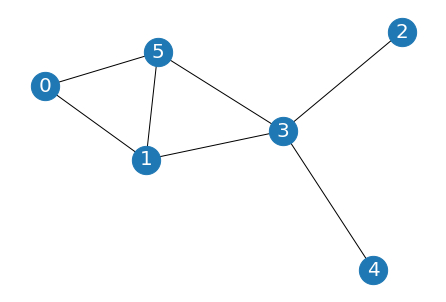

In [59]:
nx.draw(G,with_labels = True,node_size=800,font_size=20,font_color='w')

In [35]:
k = 4
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
bv

[27, 27, 0, 0, 0, 0]

In [9]:
1/(6*25)

0.006666666666666667

In [32]:
k = 3
ugs2 = UGS(adjlist,k,degree,matrix_G)
order2,bv2 = ugs2.aDD_order()
graphlet2 = ugs2.Sample(bv,1)
bv2

i:0,degree:4
i:1,degree:1
i:2,degree:2
i:3,degree:3
i:4,degree:2
i:5,degree:4


[16, 9, 0, 0, 0, 0]

In [60]:
graphlet_sample = []
k = 4
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
for i in range(10000):
    #print(i)
    r = 1
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 1000 == 0:
        print(i)
graphlet_sample

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


[[1, 3, 4, 5],
 [0, 3, 4, 5],
 [1, 2, 3, 4],
 [0, 1, 2, 3],
 [1, 2, 3, 4],
 [0, 3, 4, 5],
 [1, 3, 4, 5],
 [2, 3, 4, 5],
 [1, 2, 3, 4],
 [0, 1, 3, 5],
 [1, 2, 3, 4],
 [1, 3, 4, 5],
 [1, 2, 3, 4],
 [0, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 3, 4],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [2, 3, 4, 5],
 [1, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 2, 3],
 [0, 1, 3, 4],
 [2, 3, 4, 5],
 [0, 1, 3, 5],
 [1, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 1, 3, 5],
 [1, 3, 4, 5],
 [0, 2, 3, 5],
 [1, 2, 3, 5],
 [0, 3, 4, 5],
 [1, 2, 3, 4],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [1, 2, 3, 4],
 [0, 3, 4, 5],
 [0, 1, 3, 4],
 [2, 3, 4, 5],
 [1, 3, 4, 5],
 [0, 1, 3, 4],
 [0, 1, 3, 4],
 [2, 3, 4, 5],
 [0, 2, 3, 5],
 [2, 3, 4, 5],
 [0, 1, 3, 5],
 [2, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 1, 2, 3],
 [2, 3, 4, 5],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [0, 1, 3, 4],
 [0, 1, 3, 5],
 [0, 1, 3, 4],
 [1, 3, 4, 5],
 [1, 3, 4, 5],
 [1, 2, 3, 4],
 [0, 1, 3, 4],
 [0, 3, 4, 5],
 [1, 3, 4, 5],
 [1, 3, 4, 5],
 [0, 1, 3, 5],
 [0, 3, 4, 5],
 [2, 3, 4, 5],
 [1, 3, 4, 5],
 [0, 1, 2,

In [34]:
graphlet_sample[5000:]

[[2, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 1, 2, 5],
 [0, 1, 4, 5],
 [0, 1, 2, 5],
 [0, 2, 4, 5],
 [0, 1, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 2, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 2, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 3, 5],
 [0, 1, 4, 5],
 [0, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 2, 3, 5],
 [0, 1, 4, 5],
 [0, 1, 3, 4],
 [0, 3, 4, 5],
 [0, 1, 3, 5],
 [0, 1, 2, 5],
 [0, 1, 2, 5],
 [0, 1, 2, 5],
 [0, 2, 3, 5],
 [0, 3, 4, 5],
 [0, 1, 4, 5],
 [2, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 2, 5],
 [0, 1, 2, 5],
 [2, 3, 4, 5],
 [0, 1, 2, 5],
 [0, 1, 4, 5],
 [0, 1, 4, 5],
 [0, 2, 4, 5],
 [0, 1, 2, 5],
 [0, 2, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 2, 5],
 [2, 3, 4, 5],
 [0, 1, 3, 5],
 [0, 2, 4, 5],
 [0, 2, 4, 5],
 [0, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 4, 5],
 [0, 1, 3, 5],
 [0, 2, 4, 5],
 [0, 3, 4, 5],
 [2, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 2, 5],
 [2, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 4, 5],
 [0, 1, 3,

In [38]:
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))

In [220]:
graphlet_sample

[[0, 1, 3, 4],
 [0, 2, 4, 5],
 [0, 2, 3, 4],
 [0, 2, 4, 5],
 [0, 2, 4, 5],
 [0, 2, 3, 4],
 [0, 2, 3, 4],
 [0, 1, 2, 4],
 [0, 1, 3, 4],
 [2, 3, 4, 5],
 [0, 1, 3, 4],
 [0, 2, 4, 5],
 [0, 1, 2, 4],
 [0, 2, 4, 5],
 [0, 2, 3, 4],
 [0, 2, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 3, 4],
 [0, 2, 3, 4],
 [0, 2, 3, 4],
 [0, 1, 3, 4],
 [0, 2, 4, 5],
 [0, 2, 4, 5],
 [0, 2, 3, 4],
 [0, 2, 3, 4],
 [2, 3, 4, 5],
 [0, 2, 4, 5],
 [0, 1, 2, 4],
 [0, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 1, 3, 4],
 [0, 3, 4, 5],
 [0, 2, 4, 5],
 [0, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 2, 4, 5],
 [0, 1, 2, 4],
 [2, 3, 4, 5],
 [0, 2, 4, 5],
 [0, 1, 3, 4],
 [0, 1, 3, 4],
 [0, 3, 4, 5],
 [0, 2, 3, 4],
 [0, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 4, 5],
 [2, 3, 4, 5],
 [0, 1, 2, 4],
 [2, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 2, 3, 4],
 [0, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 1, 2, 4],
 [0, 3, 4, 5],
 [0, 1, 3, 4],
 [2, 3, 4, 5],
 [0, 1, 2, 4],
 [2, 3, 4, 5],
 [0, 1, 3, 4],
 [0, 3, 4, 5],
 [0, 2, 3, 4],
 [0, 1, 3, 4],
 [0, 2, 4, 5],
 [0, 1, 3,

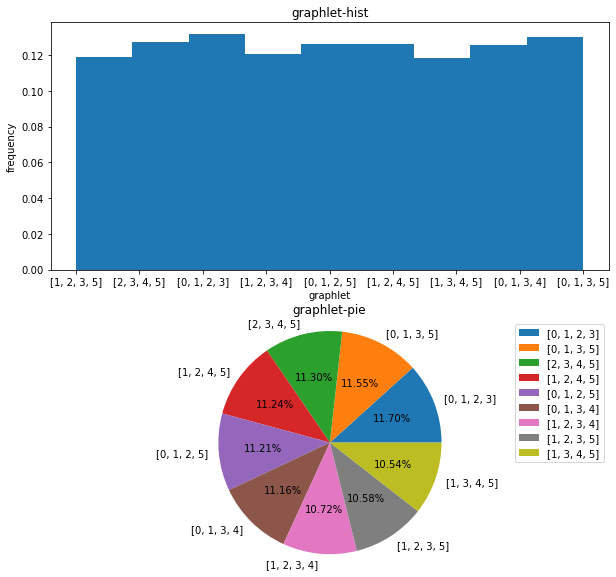

In [40]:
result = pd.value_counts(graphlet_sample_str)
figure,axes = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axes[0].hist(graphlet_sample_str,density=True,bins=result.size)
axes[0].set_xlabel('graphlet')
axes[0].set_ylabel('frequency')
axes[0].set_title('graphlet-hist')

axes[1].pie(result,labels=result.index,autopct='%1.2f%%')
axes[1].axis('equal')
axes[1].legend()
axes[1].set_title('graphlet-pie')

plt.show()

In [46]:
graphlet_sample[5000:]

[[2, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 1, 2, 5],
 [0, 1, 4, 5],
 [0, 1, 2, 5],
 [0, 2, 4, 5],
 [0, 1, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 2, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 3, 5],
 [0, 2, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 3, 5],
 [0, 1, 4, 5],
 [0, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 2, 3, 5],
 [0, 1, 4, 5],
 [0, 1, 3, 4],
 [0, 3, 4, 5],
 [0, 1, 3, 5],
 [0, 1, 2, 5],
 [0, 1, 2, 5],
 [0, 1, 2, 5],
 [0, 2, 3, 5],
 [0, 3, 4, 5],
 [0, 1, 4, 5],
 [2, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 2, 5],
 [0, 1, 2, 5],
 [2, 3, 4, 5],
 [0, 1, 2, 5],
 [0, 1, 4, 5],
 [0, 1, 4, 5],
 [0, 2, 4, 5],
 [0, 1, 2, 5],
 [0, 2, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 4, 5],
 [0, 1, 2, 5],
 [2, 3, 4, 5],
 [0, 1, 3, 5],
 [0, 2, 4, 5],
 [0, 2, 4, 5],
 [0, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 4, 5],
 [0, 1, 3, 5],
 [0, 2, 4, 5],
 [0, 3, 4, 5],
 [2, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 2, 5],
 [2, 3, 4, 5],
 [2, 3, 4, 5],
 [0, 2, 3, 5],
 [0, 1, 3, 5],
 [0, 1, 4, 5],
 [0, 1, 3,

In [88]:

gfd = [0]*9 # k=3,4
for g in graphlet_sample:
    #print(g)
    p = 0
    graphlet_degree = [0]*4
    for v in g:
        #print('v:',v)
        for u in adjlist[v].elements():
            #print('u:',u)
            if u in g:
                graphlet_degree[p] += 1
        p += 1
        
    graphlet_degree.sort()
#     if g == [0,3,4,5]:
#         print(graphlet_degree)
    graphlet_sort = 0
    if len(g) == 3:
        if graphlet_degree[1] == 1:
            graphlet_sort = 1
        elif graphlet_degree[1] == 2:
            graphlet_sort = 2

    if len(g) == 4:
        if graphlet_degree == [1,1,2,2]:
            graphlet_sort = 3
        elif graphlet_degree == [1,1,1,3]:
            graphlet_sort = 4
        elif graphlet_degree == [2,2,2,2]:
            graphlet_sort = 5
        elif graphlet_degree == [1,2,2,3]:
            graphlet_sort = 6
        elif graphlet_degree == [2,2,3,3]:
            graphlet_sort = 7
        elif graphlet_degree == [3,3,3,3]:
            graphlet_sort = 8
            
    gfd[graphlet_sort] += 1
            
gfd_score = [math.log(i+1) for i in gfd]            

In [89]:
gfd

[0, 6317, 3683, 1765, 240, 0, 5447, 2548, 0]

<ipython-input-90-132c10842a26>:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[0].set_xticks(range(1,len(gfd)+1),range(1,10))
<ipython-input-90-132c10842a26>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[1].set_xticks(range(1,len(gfd_score)+1),range(1,10))


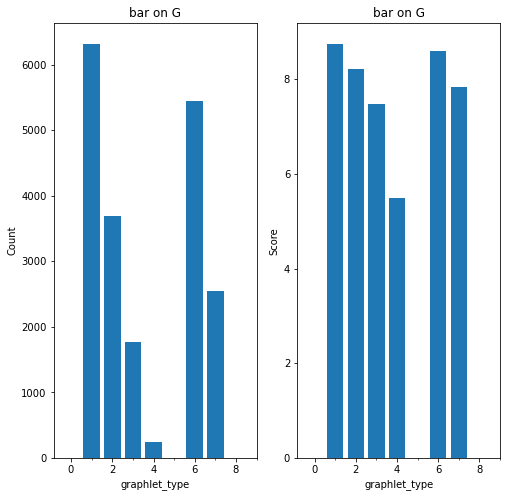

In [90]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,8))
axes[0].bar(range(0,len(gfd)),gfd)
axes[0].set_xticks(range(1,len(gfd)+1),range(1,10))
axes[0].set_xlabel('graphlet_type')
axes[0].set_ylabel('Count')
axes[0].set_title('bar on G')

axes[1].bar(range(0,len(gfd_score)),gfd_score)
axes[1].set_xticks(range(1,len(gfd_score)+1),range(1,10))
axes[1].set_xlabel('graphlet_type')
axes[1].set_ylabel('Score')
axes[1].set_title('bar on G')

plt.savefig('ER N6K3S10000 GFD bar')

In [91]:
graphlet_set = []
for g in graphlet_sample:
    if g not in graphlet_set:
        graphlet_set.append(g)
graphlet_set

[[0, 3, 5],
 [3, 4, 5],
 [0, 2, 5],
 [0, 4, 5],
 [0, 3, 4],
 [2, 4, 5],
 [0, 2, 3],
 [0, 1, 5],
 [2, 3, 5],
 [0, 1, 4],
 [0, 1, 3],
 [2, 3, 4, 5],
 [0, 3, 4, 5],
 [0, 2, 3, 4],
 [0, 1, 2, 5],
 [0, 2, 4, 5],
 [0, 1, 3, 5],
 [0, 2, 3, 5],
 [0, 1, 4, 5],
 [0, 1, 2, 3],
 [0, 1, 3, 4]]

In [92]:
gfd_real = [0]*9 # k=3,4
for g in graphlet_set:
    #print(g)
    p = 0
    graphlet_degree = [0]*4
    for v in g:
        #print('v:',v)
        for u in adjlist[v].elements():
            #print('u:',u)
            if u in g:
                graphlet_degree[p] += 1
        p += 1
        
    graphlet_degree.sort()
#     if g == [0,3,4,5]:
#         print(graphlet_degree)
    graphlet_sort = 0
    if len(g) == 3:
        if graphlet_degree[1] == 1:
            graphlet_sort = 1
        elif graphlet_degree[1] == 2:
            graphlet_sort = 2

    if len(g) == 4:
        if graphlet_degree == [1,1,2,2]:
            graphlet_sort = 3
        elif graphlet_degree == [1,1,1,3]:
            graphlet_sort = 4
        elif graphlet_degree == [2,2,2,2]:
            graphlet_sort = 5
        elif graphlet_degree == [1,2,2,3]:
            graphlet_sort = 6
        elif graphlet_degree == [2,2,3,3]:
            graphlet_sort = 7
        elif graphlet_degree == [3,3,3,3]:
            graphlet_sort = 8
            
    gfd_real[graphlet_sort] += 1
            
gfd_real_score = [math.log(i+1) for i in gfd_real]            

In [97]:
gfd_real[3] = 2
gfd_real_score = [math.log(i+1) for i in gfd_real] 

<ipython-input-98-23ff0f6d84f1>:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[0].set_xticks(range(1,len(gfd_real)+1),range(1,10))
<ipython-input-98-23ff0f6d84f1>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[1].set_xticks(range(1,len(gfd_real_score)+1),range(1,10))


Text(0.5, 1.0, 'bar on G')

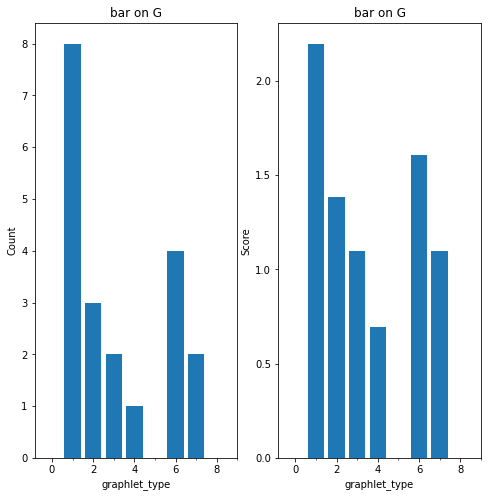

In [98]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,8))
axes[0].bar(range(0,len(gfd_real)),gfd_real)
axes[0].set_xticks(range(1,len(gfd_real)+1),range(1,10))
axes[0].set_xlabel('graphlet_type')
axes[0].set_ylabel('Count')
axes[0].set_title('bar on G')

axes[1].bar(range(0,len(gfd_real_score)),gfd_real_score)
axes[1].set_xticks(range(1,len(gfd_real_score)+1),range(1,10))
axes[1].set_xlabel('graphlet_type')
axes[1].set_ylabel('Score')
axes[1].set_title('bar on G')

In [ ]:

gfd = [0]*9 # k=3,4
for g in graphlet_sample:
    #print(g)
    p = 0
    graphlet_degree = [0]*4
    for v in g:
        #print('v:',v)
        for u in adjlist[v].elements():
            #print('u:',u)
            if u in g:
                graphlet_degree[p] += 1
        p += 1
        
    graphlet_degree.sort()
#     if g == [0,3,4,5]:
#         print(graphlet_degree)
    graphlet_sort = 0
    if len(g) == 3:
        if graphlet_degree[1] == 1:
            graphlet_sort = 1
        elif graphlet_degree[1] == 2:
            graphlet_sort = 2

    if len(g) == 4:
        if graphlet_degree == [1,1,2,2]:
            graphlet_sort = 3
        elif graphlet_degree == [1,1,1,3]:
            graphlet_sort = 4
        elif graphlet_degree == [2,2,2,2]:
            graphlet_sort = 5
        elif graphlet_degree == [1,2,2,3]:
            graphlet_sort = 6
        elif graphlet_degree == [2,2,3,3]:
            graphlet_sort = 7
        elif graphlet_degree == [3,3,3,3]:
            graphlet_sort = 8
            
    gfd[graphlet_sort] += 1
            
gfd_score = [math.log(i+1) for i in gfd]            

<ipython-input-107-3de26de2a342>:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[0].set_xticks(range(1,len(gfd)+1),range(1,10))
<ipython-input-107-3de26de2a342>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[1].set_xticks(range(1,len(gfd_score)+1),range(1,10))


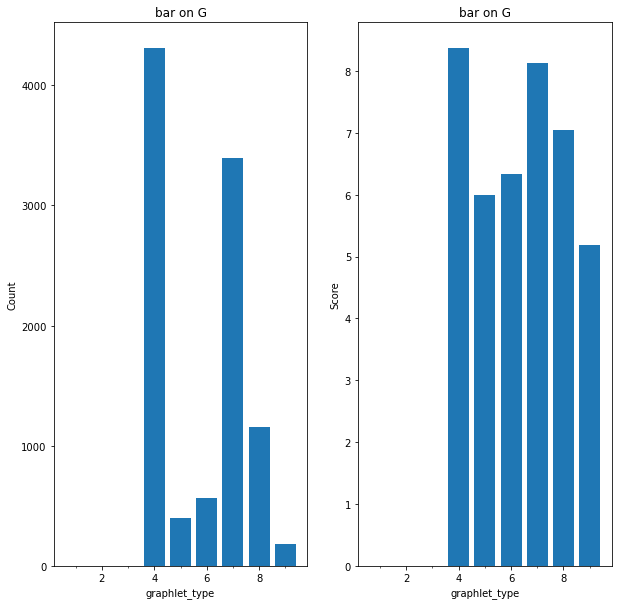

In [107]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
axes[0].bar(range(1,len(gfd)+1),gfd)
axes[0].set_xticks(range(1,len(gfd)+1),range(1,10))
axes[0].set_xlabel('graphlet_type')
axes[0].set_ylabel('Count')
axes[0].set_title('bar on G')

axes[1].bar(range(1,len(gfd_score)+1),gfd_score)
axes[1].set_xticks(range(1,len(gfd_score)+1),range(1,10))
axes[1].set_xlabel('graphlet_type')
axes[1].set_ylabel('Score')
axes[1].set_title('bar on G')

plt.savefig('ER N6K4S10000 GFD bar')

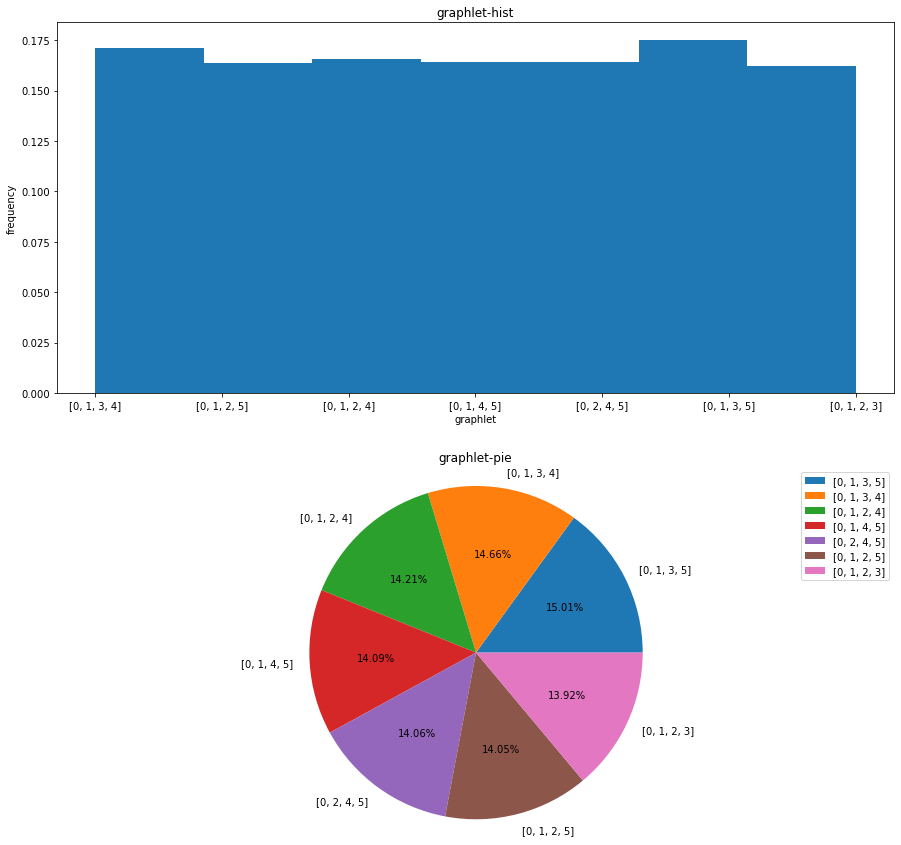

In [106]:
result = pd.value_counts(graphlet_sample_str)
figure,axes = plt.subplots(nrows=2,ncols=1,figsize=(15,15))
axes[0].hist(graphlet_sample_str,density=True,bins=result.size)
axes[0].set_xlabel('graphlet')
axes[0].set_ylabel('frequency')
axes[0].set_title('graphlet-hist')

axes[1].pie(result,labels=result.index,autopct='%1.2f%%')
axes[1].axis('equal')
axes[1].legend()
axes[1].set_title('graphlet-pie')

plt.savefig('ER N6K4S10000 hist&pie')
plt.show()

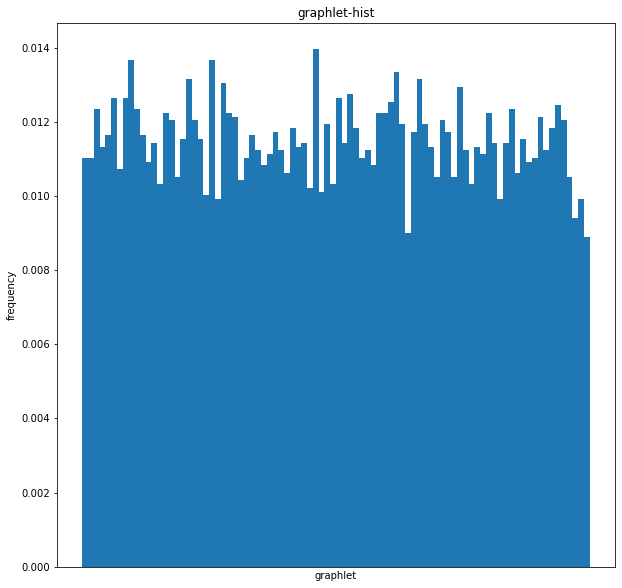

In [117]:
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
plt.savefig('ER N10K4S10000 hist')
plt.show()

In [10]:
data = []
with open('./footballUND.txt','r') as f:
    for line in f.readlines():
        line = line.strip()
        line = line.split('\t')
        data.append(line)

In [11]:
len(data)

613

In [12]:
N = 114
k = 4
matrix_G = np.zeros((114,114),dtype='int')
# 默认顶点编号从0开始
for e in data:
    matrix_G[int(e[0])-1,int(e[1])-1] = 1
    matrix_G[int(e[1])-1,int(e[0])-1] = 1   
degree = list(np.sum(matrix_G,axis=1))
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet_sample = []
for i in range(1000000):
    if i%1000 == 0:
        print(i)
    g = ugs.Sample(bv)
    graphlet_sample.append(sorted(g))
    #print(ugs.Sample(bv))
graphlet_sample_str = [] 
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
    


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [59]:
result = pd.value_counts(graphlet_sample_str)
result = pd.DataFrame(result/10,columns=['count'])
result.describe()

,count
count,38302.000000
mean,2.610830
std,0.510742
min,0.900000
25%,2.300000
50%,2.600000
75%,2.900000
max,5.000000


In [60]:
result

,count
"[8, 44, 59, 75]",5.0
"[6, 59, 75, 98]",4.7
"[31, 36, 50, 95]",4.7
"[5, 29, 79, 99]",4.6
"[26, 53, 63, 87]",4.6
...,...
"[59, 62, 70, 98]",1.0
"[5, 11, 79, 108]",0.9
"[0, 19, 99, 102]",0.9
"[10, 12, 42, 66]",0.9


In [63]:
result.query('count>2.15 and count<2.95')

,count
"[37, 78, 106, 113]",2.9
"[27, 30, 93, 98]",2.9
"[44, 48, 78, 109]",2.9
"[0, 28, 37, 113]",2.9
"[17, 19, 66, 89]",2.9
...,...
"[31, 61, 83, 85]",2.2
"[18, 43, 77, 98]",2.2
"[15, 16, 100, 101]",2.2
"[16, 28, 66, 88]",2.2


In [64]:
21792/38302

0.5689520129497154

No handles with labels found to put in legend.


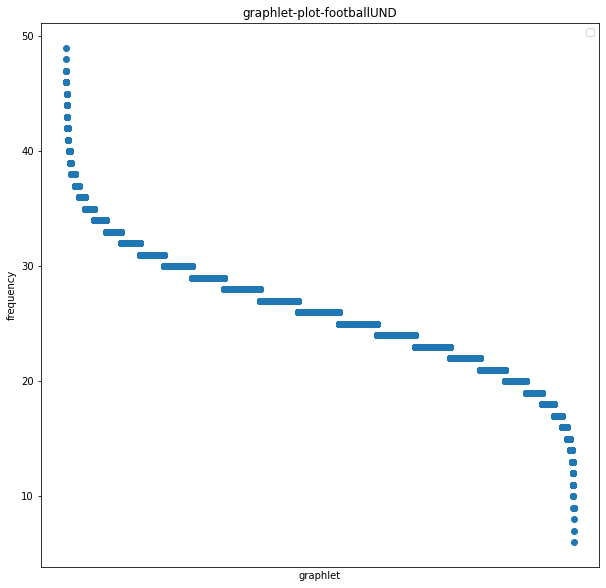

In [12]:
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.scatter(result.index,result)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-plot-footballUND')
plt.legend()
plt.savefig('footballUND N114K4S10000 scatter')
plt.show()

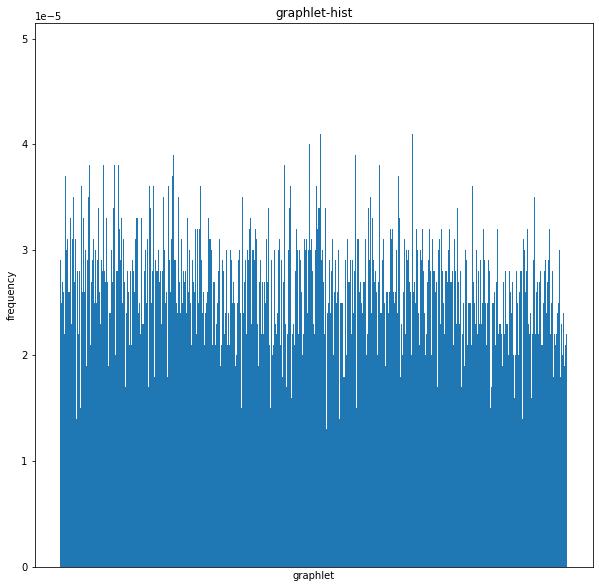

In [13]:
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
plt.savefig('footbalUND hist 106')
plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


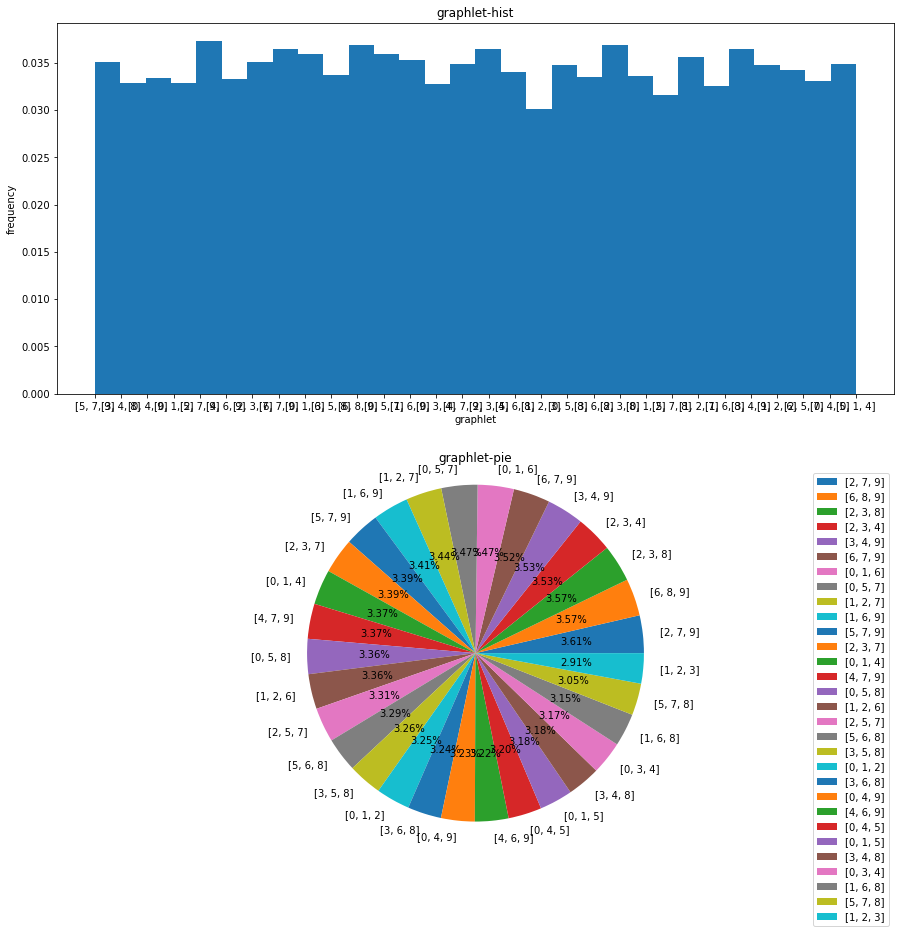

In [10]:
# 彼得森图
k = 3
G = nx.petersen_graph()
matrix_G = nx.adjacency_matrix(G).todense()
N = matrix_G.shape[0]
degree = []
for i in G.degree():
    degree.append(i[1])
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(10000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
figure,axes = plt.subplots(nrows=2,ncols=1,figsize=(15,15))
axes[0].hist(graphlet_sample_str,density=True,bins=result.size)
axes[0].set_xlabel('graphlet')
axes[0].set_ylabel('frequency')
axes[0].set_title('graphlet-hist')

axes[1].pie(result,labels=result.index,autopct='%1.2f%%')
axes[1].axis('equal')
axes[1].legend()
axes[1].set_title('graphlet-pie')

plt.savefig('Peterson Graph hist&pie')
plt.show()

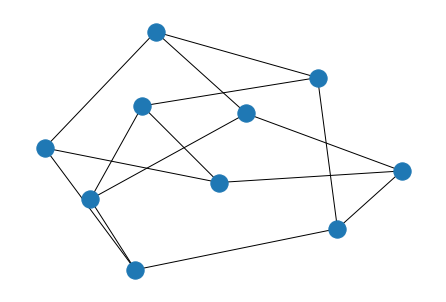

In [15]:
G = nx.petersen_graph()
nx.draw(G)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

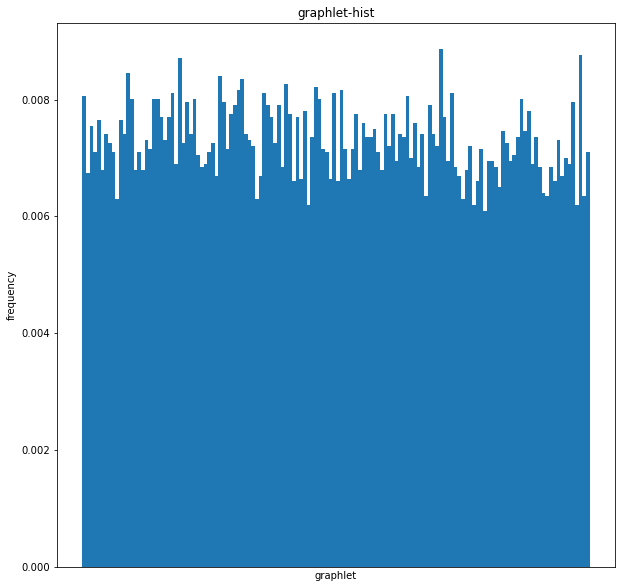

In [13]:
# Tutte图
k = 3
G = nx.tutte_graph()
matrix_G = nx.adjacency_matrix(G).todense()
N = matrix_G.shape[0]
degree = []
for i in G.degree():
    degree.append(i[1])
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(20000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
plt.savefig('Tutte_Graph hist')
plt.show()

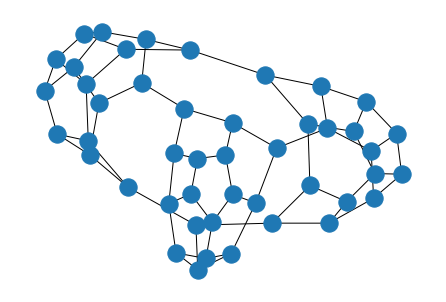

In [16]:
G = nx.tutte_graph()
nx.draw(G)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

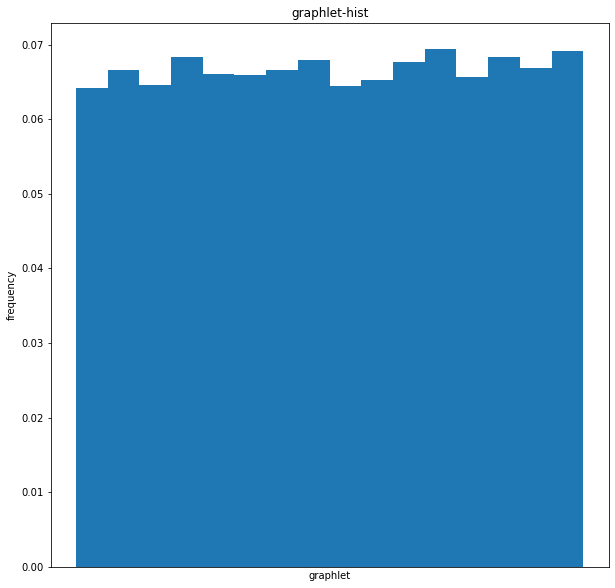

In [14]:
# 带循环的小迷宫
k = 3
G = nx.sedgewick_maze_graph()
matrix_G = nx.adjacency_matrix(G).todense()
N = matrix_G.shape[0]
degree = []
for i in G.degree():
    degree.append(i[1])
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(20000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
plt.savefig('Sedgewick_Maze_Graph hist')
plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

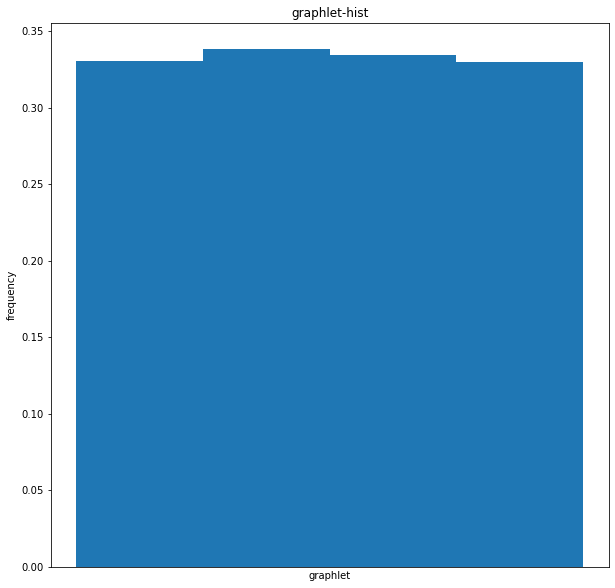

In [15]:
#  3-regular Platonic Tetrahedral graph
k = 3
G = nx.tetrahedral_graph()
matrix_G = nx.adjacency_matrix(G).todense()
N = matrix_G.shape[0]
degree = []
for i in G.degree():
    degree.append(i[1])
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(20000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
plt.savefig('Tetrahedral_Graph hist')
plt.show()

[[0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
i:0,degree:6
i:1,degree:6
i:2,degree:6
i:3,degree:6
i:4,degree:6
i:5,degree:6
i:6,degree:6
i:7,degree:6
i:8,degree:6
i:9,degree:6
i:10,degree:6
i:11,degree:6
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
98

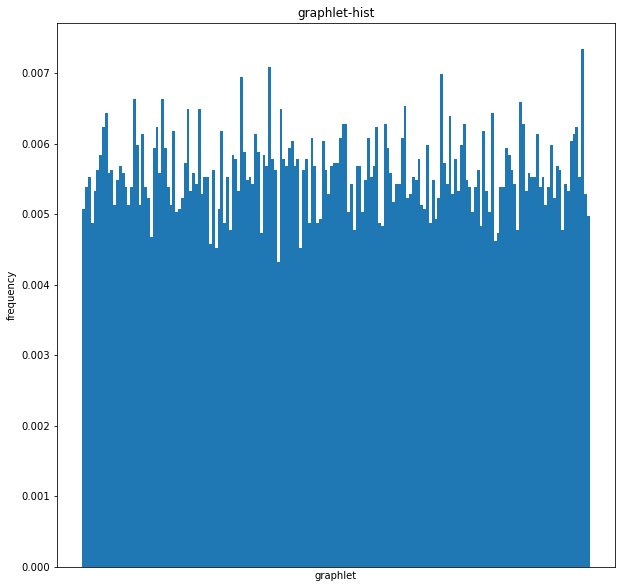

In [28]:
#  二分图
k = 3
N = 12
G = nx.complete_bipartite_graph(N//2,N//2)
matrix_G = nx.adjacency_matrix(G).todense()
print(matrix_G)
degree = []
for i in G.degree():
    degree.append(i[1])
print(degree)
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(20000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
plt.savefig('Tetrahedral_Graph hist')
plt.show()

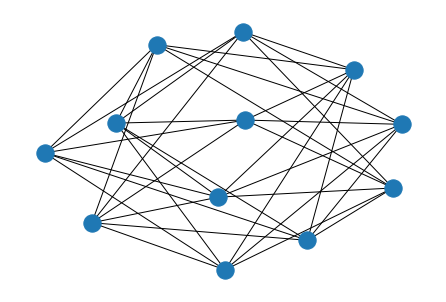

In [17]:
N=12
G = nx.complete_bipartite_graph(N//2,N//2)
nx.draw(G)

[[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0]]
[4, 4, 4, 5, 3, 4, 4, 2, 4, 6, 4, 3, 5, 4, 3, 4, 5, 3, 4, 5]
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


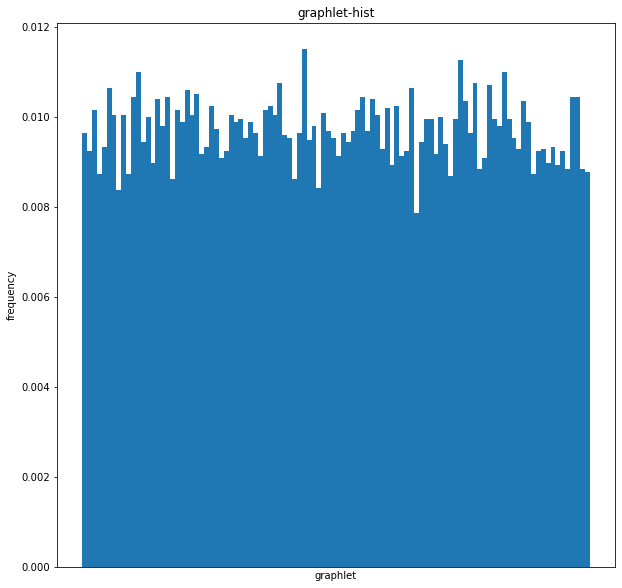

In [79]:
#  小世界图
k = 3
N = 20
G = nx.watts_strogatz_graph(N,4,0.5)
matrix_G = nx.adjacency_matrix(G).todense()
print(matrix_G)
degree = []
for i in G.degree():
    degree.append(i[1])
print(degree)
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(20000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
plt.savefig('Watts_Strogatz_Graph hist')
plt.show()

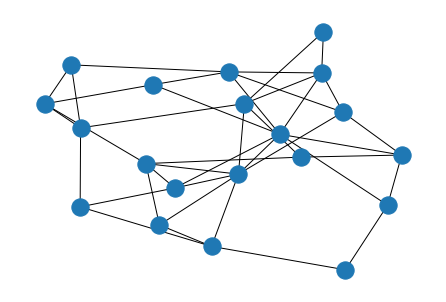

In [18]:
N = 20
G = nx.watts_strogatz_graph(N,4,0.5)
nx.draw(G)

[[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0]]
[3, 3, 4, 6, 3, 4, 3, 5, 3, 2, 7, 4, 5, 4, 4, 4, 5, 4, 2, 5]
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


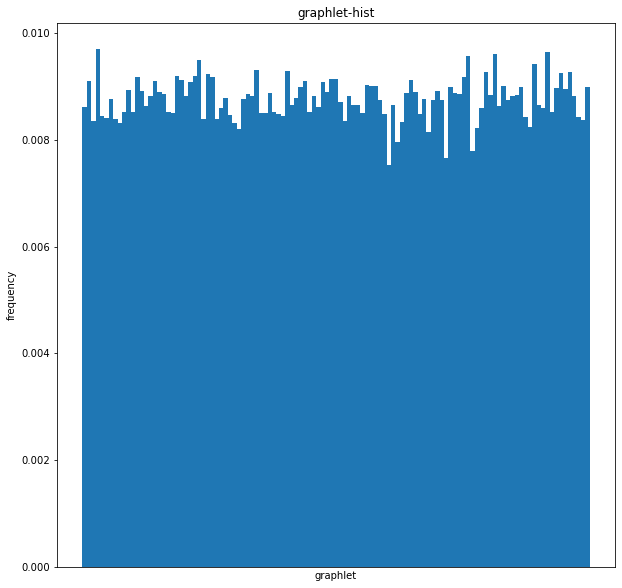

In [77]:
#  小世界图
k = 3
N = 20
G = nx.watts_strogatz_graph(N,4,0.5)
matrix_G = nx.adjacency_matrix(G).todense()
print(matrix_G)
degree = []
for i in G.degree():
    degree.append(i[1])
print(degree)
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(50000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
# plt.savefig('Watts_Strogatz_Graph hist 50000')
plt.show()

In [80]:
result = pd.DataFrame(result,columns=['count'])
result.describe()

,count
count,104.000000
mean,192.307692
std,13.308933
min,156.000000
25%,183.000000
50%,192.000000
75%,201.000000
max,228.000000


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

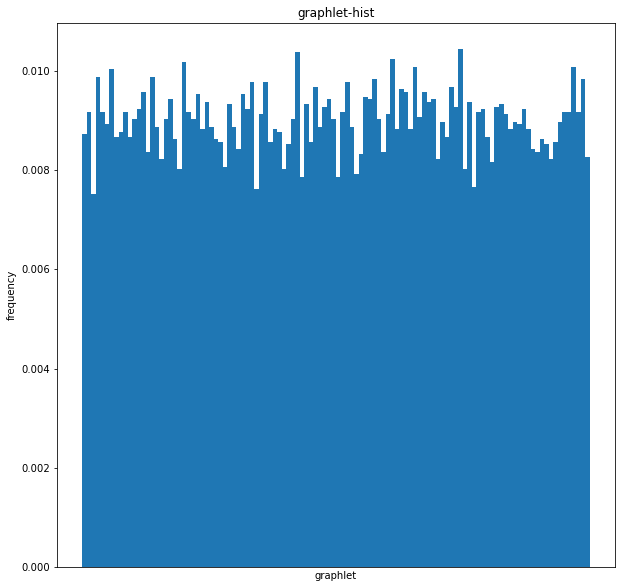

In [75]:
# 构建一个邻接表
adjlist = [LList() for i in range(N)]
for i in range(N):
    for j in range(N):
        if matrix_G[i,j] == 1:
            adjlist[i].append(j)
ugs = UGS(adjlist,k,degree,matrix_G)
order,bv = ugs.aDD_order()
graphlet = ugs.Sample(bv)
graphlet_sample = []
for i in range(20000):
    #print(i)
    g = ugs.Sample(bv)
    for j in range(k):
        g[j] = order[g[j]]
    graphlet_sample.append(sorted(g))
    if i % 100 == 0:
        print(i)
graphlet_sample_str = []
for g in graphlet_sample:
    graphlet_sample_str.append(str(g))
result = pd.value_counts(graphlet_sample_str)
plt.figure(figsize=(10,10))
plt.hist(graphlet_sample_str,density=True,bins=result.size)
plt.xticks([])
plt.xlabel('graphlet')
plt.ylabel('frequency')
plt.title('graphlet-hist')
# plt.savefig('Watts_Strogatz_Graph hist 50000')
plt.show()

In [76]:
result = pd.DataFrame(result,columns=['count'])
result.describe()

,count
count,112.000000
mean,178.571429
std,12.174937
min,149.000000
25%,171.000000
50%,179.000000
75%,186.000000
max,207.000000


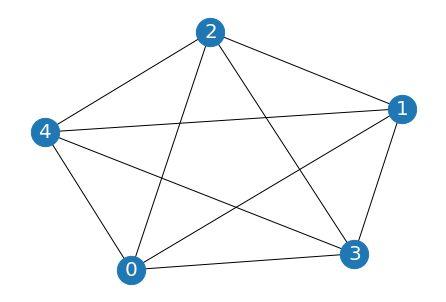

In [2]:
G = nx.complete_graph(5)
nx.draw(G,with_labels = True,node_size=800,font_size=20,font_color='w')

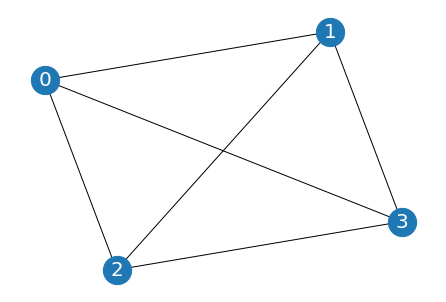

In [3]:
G = nx.complete_graph(4)
nx.draw(G,with_labels = True,node_size=800,font_size=20,font_color='w')

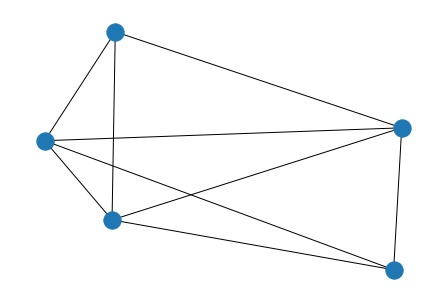

In [6]:
G = nx.erdos_renyi_graph(5, 0.75)
nx.draw(G)